In [ ]:
# ===============================
# Import Required Libraries
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

# Scikit-learn & ML Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# External ML Library
import lightgbm as lgb

# ===============================
# Load and Prepare Dataset
# ===============================
dataset = pd.read_csv('Dataset.csv')

# Feature selection (columns 15 to 25) and target (column 0)
X = dataset.iloc[:, 15:26].values
y = dataset.iloc[:, 0].values

# Split dataset into training and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# ===============================
# Feature Scaling
# ===============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===============================
# Logistic Regression
# ===============================
log_model = LogisticRegression(random_state=0)
log_model.fit(X_train, y_train)

# Predictions
y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)

print('*************** Logistic Regression ***************')
print(f'Misclassified samples (train): {(y_train != y_pred_train).sum()}')
print(f'Accuracy (train): {accuracy_score(y_train, y_pred_train):.2f}')
train_loss = np.mean([np.sqrt(((yt - yp) ** 2) / 20) for yt, yp in zip(y_train, y_pred_train)])
print(f'Average error (train): {train_loss:.4f}')

print(f'Misclassified samples (test): {(y_test != y_pred_test).sum()}')
print(f'Accuracy (test): {accuracy_score(y_test, y_pred_test):.2f}')
test_loss = np.mean([np.sqrt(((yt - yp) ** 2) / 20) for yt, yp in zip(y_test, y_pred_test)])
print(f'Average error (test): {test_loss:.4f}')

# Confusion Matrix and R2 Score
cm = confusion_matrix(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f'\nR2 Score (Logistic Regression): {r2:.4f}')

# ===============================
# Support Vector Machine (SVM)
# ===============================
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)

print('\n*************** SVM ***************')
print('--------- Training Data ---------')
y_pred_train_svm = svm_model.predict(X_train)
mc_train = (y_train != y_pred_train_svm).sum()
acc_train = accuracy_score(y_train, y_pred_train_svm)
train_loss_svm = np.mean([np.sqrt(((yt - yp) ** 2) / 20) for yt, yp in zip(y_train, y_pred_train_svm)])

print(f'Misclassified samples (train): {mc_train}')
print(f'Accuracy (train): {acc_train:.2f}')
print(f'Average error (train): {train_loss_svm:.4f}')

print('--------- Testing Data ---------')
y_pred_test_svm = svm_model.predict(X_test)
mc_test = (y_test != y_pred_test_svm).sum()
acc_test = accuracy_score(y_test, y_pred_test_svm)
test_loss_svm = np.mean([np.sqrt(((yt - yp) ** 2) / 20) for yt, yp in zip(y_test, y_pred_test_svm)])

print(f'Misclassified samples (test): {mc_test}')
print(f'Accuracy (test): {acc_test:.2f}')
print(f'Average error (test): {test_loss_svm:.4f}')


*************** Logistic Regression ***************
Misclassified samples (train): 65
Accuracy (train): 0.47
Average error (train): 0.5417
Misclassified samples (test): 34
Accuracy (test): 0.19
Average error (test): 0.6389

R2 Score (Logistic Regression): 0.1028

*************** SVM ***************
--------- Training Data ---------
Misclassified samples (train): 58
Accuracy (train): 0.53
Average error (train): 0.4945
--------- Testing Data ---------
Misclassified samples (test): 32
Accuracy (test): 0.24
Average error (test): 0.7241


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# -----------------------------------------------------------------------------
# Binary Classifier Utility (non-destructive)
# -----------------------------------------------------------------------------
def classify(y):
    """
    Return binary classification labels based on threshold:
    - 1 if y > 11
    - 0 otherwise
    """
    return np.where(y > 11, 1, 0)

# -----------------------------------------------------------------------------
# Create preserved copies of training/test labels
# -----------------------------------------------------------------------------
y_train_orig = y_train.copy()
y_test_orig = y_test.copy()

# -----------------------------------------------------------------------------
# K-Nearest Neighbors (KNN) Classifier
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
print("K-Nearest Neighbors (KNN) Classifier")

# Use binary classification copies
y_train_bin = classify(y_train_orig.copy())
y_test_bin = classify(y_test_orig.copy())

for n_neighbors in [29]:
    print(f"\nNumber of neighbors: {n_neighbors}")
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=2, metric='minkowski')
    knn.fit(X_train, y_train_bin)

    # Evaluate on training data
    y_pred_train = knn.predict(X_train)
    print("Training set size:", len(y_train_bin))
    print("Misclassified (train):", (y_train_bin != y_pred_train).sum())
    print("Training Accuracy: {:.2f}".format(accuracy_score(y_train_bin, y_pred_train)))

    # Evaluate on combined train + test
    X_combined_bin = np.vstack((X_train, X_test))
    y_combined_bin = np.hstack((y_train_bin, y_test_bin))
    y_combined_pred = knn.predict(X_combined_bin)
    print("Combined set size:", len(y_combined_bin))
    print("Misclassified (combined):", (y_combined_bin != y_combined_pred).sum())
    print("Combined Accuracy: {:.2f}".format(accuracy_score(y_combined_bin, y_combined_pred)))

# -----------------------------------------------------------------------------
# Random Forest Classifier (with original labels)
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
print("Random Forest Classifier")

for n_trees in [11]:
    print(f"\nNumber of trees: {n_trees}")
    
    forest = RandomForestClassifier(
        n_estimators=n_trees,
        criterion='entropy',
        random_state=1,
        n_jobs=4
    )
    forest.fit(X_train, y_train_orig)  # use original labels

    # Evaluate on test data
    y_pred_test = forest.predict(X_test)
    print("Test set size:", len(y_test_orig))
    print("Misclassified (test):", (y_test_orig != y_pred_test).sum())
    print("Test Accuracy: {:.2f}".format(accuracy_score(y_test_orig, y_pred_test)))

    # Evaluate on combined data
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train_orig, y_test_orig))
    y_combined_pred = forest.predict(X_combined)
    print("Combined set size:", len(y_combined))
    print("Misclassified (combined):", (y_combined != y_combined_pred).sum())
    print("Combined Accuracy: {:.2f}".format(accuracy_score(y_combined, y_combined_pred)))


----------------------------------------------------------------------
K-Nearest Neighbors (KNN) Classifier

Number of neighbors: 29
Training set size: 123
Misclassified (train): 24
Training Accuracy: 0.80
Combined set size: 165
Misclassified (combined): 31
Combined Accuracy: 0.81

----------------------------------------------------------------------
Random Forest Classifier

Number of trees: 11
Test set size: 42
Misclassified (test): 37
Test Accuracy: 0.12
Combined set size: 165
Misclassified (combined): 38
Combined Accuracy: 0.77


Custom Naive Bayes Training Accuracy: 0.81
Sklearn GaussianNB Test Accuracy: 0.76


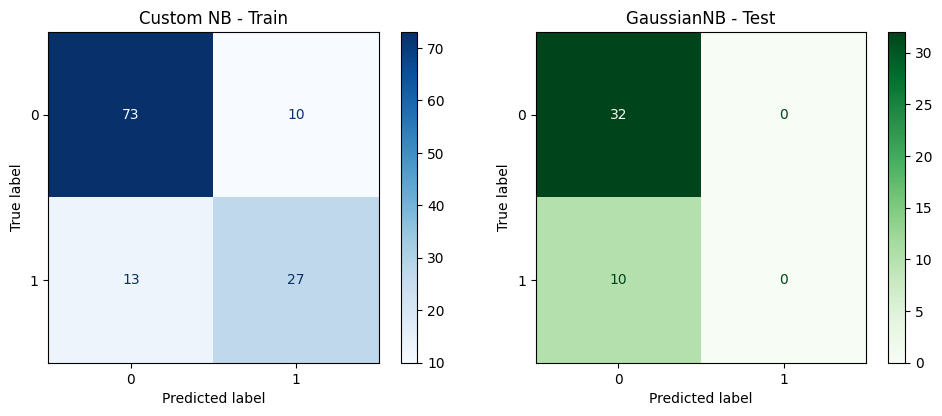

In [16]:
#Naive Bayes and accuracy comparison

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset, select features and binarize target based on threshold
def load_and_prepare_data(file_path, threshold=8):
    dataset = pd.read_csv(file_path)
    X = dataset.iloc[:, 15:26].values
    y = dataset.iloc[:, 0].values
    y = (y > threshold).astype(int)
    return train_test_split(X, y, test_size=0.25, random_state=0)

# Compute mean and std deviation for each feature per class
def compute_mean_std(X_train, y_train):
    means = {}
    stds = {}
    for c in np.unique(y_train):
        means[c] = X_train[y_train == c].mean(axis=0)
        stds[c] = X_train[y_train == c].std(axis=0)
    return means, stds

# Calculate Gaussian probability density (without normalization factor)
def gaussian_prob(x, mean, std):
    return np.exp(-((x - mean) ** 2) / (2 * std ** 2 + 1e-10))

# Predict class labels using Naive Bayes assumption
def predict_naive_bayes(X, means, stds, priors):
    y_pred = []
    for sample in X:
        posteriors = {}
        for c in priors:
            likelihood = np.prod(gaussian_prob(sample, means[c], stds[c]))
            posteriors[c] = priors[c] * likelihood
        y_pred.append(max(posteriors, key=posteriors.get))
    return np.array(y_pred)

# Load data and split into train/test sets
X_train, X_test, y_train, y_test = load_and_prepare_data('Dataset.csv')

# Train custom Naive Bayes model
means, stds = compute_mean_std(X_train, y_train)
priors = {c: np.mean(y_train == c) for c in np.unique(y_train)}
y_train_pred_custom = predict_naive_bayes(X_train, means, stds, priors)

# Train and predict with sklearn GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred_sklearn = gnb.predict(X_test)

# Print accuracy scores
print(f"Custom Naive Bayes Training Accuracy: {accuracy_score(y_train, y_train_pred_custom):.2f}")
print(f"Sklearn GaussianNB Test Accuracy: {accuracy_score(y_test, y_test_pred_sklearn):.2f}")

# Plot confusion matrices for train (custom NB) and test (sklearn NB)
cm_train = confusion_matrix(y_train, y_train_pred_custom)
cm_test = confusion_matrix(y_test, y_test_pred_sklearn)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
disp_train.plot(ax=axs[0], cmap='Blues')
axs[0].set_title("Custom NB - Train")
disp_test.plot(ax=axs[1], cmap='Greens')
axs[1].set_title("GaussianNB - Test")
plt.tight_layout()
plt.show()
